# Recognizing Handwritten Digits
> Data analysis is not limited to numbers and strings, because images and sounds can also be analyzed and classified.
Recognizing handwritten text is a problem that can be traced back to the first automatic machines that needed to recognize individual characters in handwritten documents. OCR software must read handwritten text, or pages of printed books, for general electronic documents in which each character is well defined.

- toc:true
- branch: master
- badges: true
- comments: true
- author: Sumanashree
- categories: [DataAnalysis]

## Introduction

**Recognizing handwritten text is a problem that can be traced back to the first automatic 
machines that needed to recognize individual characters in handwritten documents. 
Think about, for example, the ZIP codes on letters at the post office and the automation 
needed to recognize these five digits. Perfect recognition of these codes is necessary in 
order to sort mail automatically and efficiently.**

**Included among the other applications that may come to mind is OCR (Optical 
Character Recognition) software. OCR software must read handwritten text, or pages of 
printed books, for general electronic documents in which each character is well 
defined.
  But the problem of handwriting recognition goes farther back in time, more 
precisely to the early 20th Century (1920s), when Emanuel Goldberg (1881–1970) began 
his studies regarding this issue and suggested that a statistical approach would be an 
optimal choice.**

**To address this issue in Python, the scikit-learn library provides a good example 
to better understand this technique, the issues involved, and the possibility of making 
predictions.**

**Let's first import the required Libraries.**

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

**Now let's import the dataset of images called digits.**

In [2]:
digits = datasets.load_digits()

**Let’s take a look at what this DESCR (description) of the dataset shows, by printing out its contents:**

In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

**Images attribute of the dataset stores 8*8 arrays of grayscale values for each image. Attribute shape is used get the shape of an object.**

In [4]:
digits.images[1], digits.images[1].shape

(array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
        [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
        [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]]),
 (8, 8))

**Let's use the function imshow() to display the data as an image.**

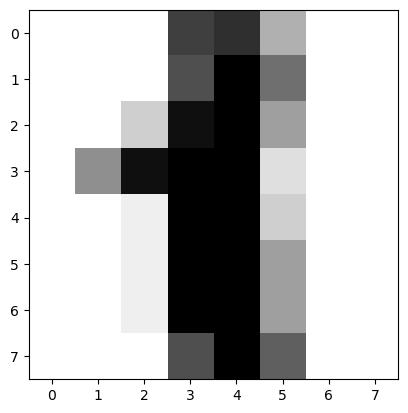

In [5]:
plt.imshow(digits.images[1], cmap=plt.cm.gray_r, interpolation='nearest')

**Target attribute of the dataset stores the digit each image represents.**

In [6]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

**Now,let's check the number of images present in the dataset using the attribute size.**

In [7]:
digits.target.size

1797

In [8]:
digits.images.shape, digits.target.shape

((1797, 8, 8), (1797,))

In [9]:
N, H, W = digits.images.shape
N, H, W

(1797, 8, 8)

**Inputs to the model should be of shape `No. of samples * No. of features`.**

**So our digits inputs should be reshaped from `1797 * 8 * 8` to `1797 * 64`.**

In [10]:
digits.images = digits.images.reshape(N, (H * W))
digits.images.shape

(1797, 64)

**case 1 : 
Now,we'll split the data into 80% train and 20% test subsets using train_test_split() function.**

In [11]:
train_X, val_X, train_y, val_y = train_test_split(digits.images, digits.target, test_size=0.2)
train_X.shape, val_X.shape, train_y.shape, val_y.shape

((1437, 64), (360, 64), (1437,), (360,))

**Let's create the RF model and fit the model to train the data and we'll predict on train and valid data using the trained model.**
**Then finally with the help of the function accuracy_score()  we'll check "how accurate our model is!"**

In [12]:
# create RF model
model = RandomForestClassifier(random_state=0)
# fit model to train data
model.fit(train_X, train_y)
# predict on train data using trained model
train_pred = model.predict(train_X)
# predict on valid data using trained model
val_pred = model.predict(val_X)
# print accuracy scores for both train and valid data
print(f"Train accuracy: {accuracy_score(train_y, train_pred)}")
print(f"Valid accuracy: {accuracy_score(val_y, val_pred)}")

Train accuracy: 1.0
Valid accuracy: 0.975


**case 2 : Now,we'll split the data into 70% train and 30% test subsets and then calculate the accuracy of the created model.**

In [13]:
train_X, val_X, train_y, val_y = train_test_split(digits.images, digits.target, test_size=0.3)
train_X.shape, val_X.shape, train_y.shape, val_y.shape

((1257, 64), (540, 64), (1257,), (540,))

In [14]:
# create RF model
model = RandomForestClassifier(random_state=0)
# fit model to train data
model.fit(train_X, train_y)
# predict on train data using trained model
train_pred = model.predict(train_X)
# predict on valid data using trained model
val_pred = model.predict(val_X)
# print accuracy scores for both train and valid data
print(f"Train accuracy: {accuracy_score(train_y, train_pred)}")
print(f"Valid accuracy: {accuracy_score(val_y, val_pred)}")

Train accuracy: 1.0
Valid accuracy: 0.9722222222222222


**case 3 : Next,split the data into 60% train and 40% test subsets and then calculate the accuracy of the created model.**

In [15]:
train_X, val_X, train_y, val_y = train_test_split(digits.images, digits.target, test_size=0.4)
train_X.shape, val_X.shape, train_y.shape, val_y.shape

((1078, 64), (719, 64), (1078,), (719,))

In [16]:
# create RF model
model = RandomForestClassifier(random_state=0)
# fit model to train data
model.fit(train_X, train_y)
# predict on train data using trained model
train_pred = model.predict(train_X)
# predict on valid data using trained model
val_pred = model.predict(val_X)
# print accuracy scores for both train and valid data
print(f"Train accuracy: {accuracy_score(train_y, train_pred)}")
print(f"Valid accuracy: {accuracy_score(val_y, val_pred)}")

Train accuracy: 1.0
Valid accuracy: 0.972183588317107


## Conclusion

**From the code above, we can see that, " In all the 3 cases the accuracy of our model is greater than 95% ". This means that it predicts the digit accurately greater than 95% of the times. " Hence the tested Hypothesis is accepted....."**

#### "I am thankful to mentors at https://internship.suvenconsultants.com for providing awesome problem statements and giving many of us a Coding Internship Exprience. Thank you www.suvenconsultants.com"
